In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
from sklearn.preprocessing import normalize;
from sklearn.model_selection import train_test_split
from sklearn import metrics

1. Загрузите прилагающийся датасет credit_data.

In [ ]:
df = pd.read_csv('credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [ ]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df['Saving accounts'] = df['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
df['Checking account'] = df['Checking account'].map({"little":1,"moderate":2,"rich":3 });
df['Risk'] = df['Risk'].map({"good":1,"bad":0});
df['Saving accounts'] = df['Saving accounts'].fillna(0)
df['Checking account'] = df['Checking account'].fillna(0)

In [ ]:
target = df['Risk']
df = df.drop(['Risk', 'Purpose'], axis=1)

In [ ]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0.0,1.0,1169,6,0,1,0,1,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0
2,49,1,1.0,0.0,2096,12,0,1,0,1,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0


3. Выведите информацию о количественных параметрах датасета;

In [ ]:
df_encoded.describe()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,1.190000,1.001000,3271.258000,20.903000,0.310000,0.690000,0.108000,0.713000,0.179000
std,11.375469,0.653614,0.966869,0.957034,2822.736876,12.058814,0.462725,0.462725,0.310536,0.452588,0.383544
min,19.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,1.000000,0.000000,1365.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,2.000000,1.000000,1.000000,2319.500000,18.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,42.000000,2.000000,1.000000,2.000000,3972.250000,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,75.000000,3.000000,4.000000,3.000000,18424.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_encoded.shape

(1000, 11)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Job               1000 non-null   int64  
 2   Saving accounts   1000 non-null   float64
 3   Checking account  1000 non-null   float64
 4   Credit amount     1000 non-null   int64  
 5   Duration          1000 non-null   int64  
 6   Sex_female        1000 non-null   uint8  
 7   Sex_male          1000 non-null   uint8  
 8   Housing_free      1000 non-null   uint8  
 9   Housing_own       1000 non-null   uint8  
 10  Housing_rent      1000 non-null   uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 59.6 KB


4. Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
y = target
x = df_encoded

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)

5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [ ]:
clf = RandomForestClassifier(max_depth=len(df_encoded.columns), random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, random_state=0)

In [ ]:
y_train_pred = clf.predict(x_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0])

6. Оцените полученную модель с помощью метрик.

In [ ]:
print(f'\033[33mДостоверность: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Достоверность (тренировочный): {metrics.accuracy_score(y_train, y_train_pred)}')
print(f'Точность: {metrics.precision_score(y_true=y_test, y_pred=y_pred, average="weighted")}')
print(f'Полнота: {metrics.recall_score(y_test, y_pred, average="weighted")}\n')
print('\033[0m')

Достоверность: 0.73
Достоверность (тренировочный): 0.975
Точность: 0.711807025617426
Полнота: 0.73




7. Понизьте размерность данных с помощью метода главных компонент.

In [ ]:
x_PCA = PCA(n_components=3).fit_transform(df_encoded, 3);
print(x_PCA.shape)
x_PCA

(1000, 3)


array([[-2.10228607e+03,  3.28930222e+01,  3.38535184e+00],
       [ 2.67980297e+03, -1.72944122e+01, -1.70905643e+01],
       [-1.17527585e+03,  1.44365824e+01,  3.20600624e+00],
       ...,
       [-2.46727262e+03,  3.16257001e+00,  1.77151005e+00],
       [-1.42619016e+03, -1.71976735e+01, -2.52118136e+01],
       [ 1.30480053e+03, -1.23095117e+01, -1.86961022e+01]])

In [ ]:
y = target
x = x_PCA

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22)

8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [ ]:
clf_2 = RandomForestClassifier(max_depth=3, random_state=0)
clf_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
y_train_pred_2 = clf_2.predict(x_train)
y_pred_2 = clf_2.predict(x_test)
y_pred_2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print(f'\033[36mДостоверность: {metrics.accuracy_score(y_test, y_pred_2)}')
print(f'Достоверность (тренировочный): {metrics.accuracy_score(y_train, y_train_pred_2)}')
print(f'Точность: {metrics.precision_score(y_true=y_test, y_pred=y_pred_2, average="weighted")}')
print(f'Полнота: {metrics.recall_score(y_test, y_pred_2, average="weighted")}\n')
print('\033[0m')

Достоверность: 0.7
Достоверность (тренировочный): 0.7346153846153847
Точность: 0.6711627906976745
Полнота: 0.7




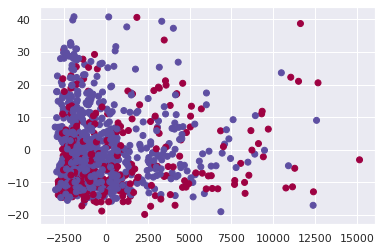

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(x_PCA[:,0], x_PCA[:,1], c=target, cmap='Spectral')
plt.figure();

9. Постройте график зависимости точности модели от размерности данных.

In [ ]:
print(x.shape[1])
x

3


array([[-2.10228607e+03,  3.28930222e+01,  3.38535184e+00],
       [ 2.67980297e+03, -1.72944122e+01, -1.70905643e+01],
       [-1.17527585e+03,  1.44365824e+01,  3.20600624e+00],
       ...,
       [-2.46727262e+03,  3.16257001e+00,  1.77151005e+00],
       [-1.42619016e+03, -1.71976735e+01, -2.52118136e+01],
       [ 1.30480053e+03, -1.23095117e+01, -1.86961022e+01]])

In [ ]:
accuarcy_arr = []
for i in range(1, x.shape[1]+1):
  pca = PCA(n_components=i)
  X_train_c = pca.fit_transform(x_train)
  X_test_c = pca.transform(x_test)
  clf_plot = RandomForestClassifier(max_depth=i, random_state=0)
  clf_plot.fit(X_train_c, y_train)
  accuarcy_arr.append(metrics.accuracy_score(y_test, clf_plot.predict(X_test_c)))

accuarcy_arr

[0.6863636363636364, 0.7090909090909091, 0.6954545454545454]

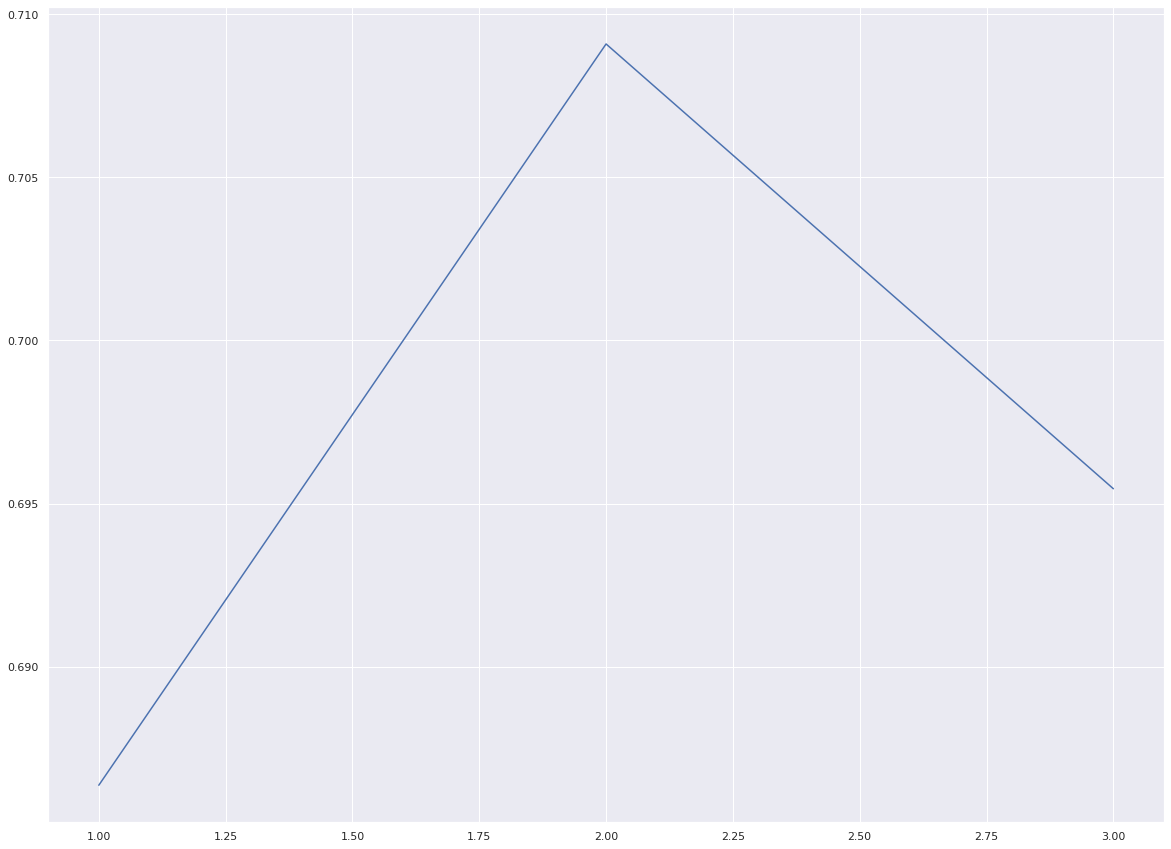

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.plot(range(1, x.shape[1]+1), accuarcy_arr);